# 线性回归

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

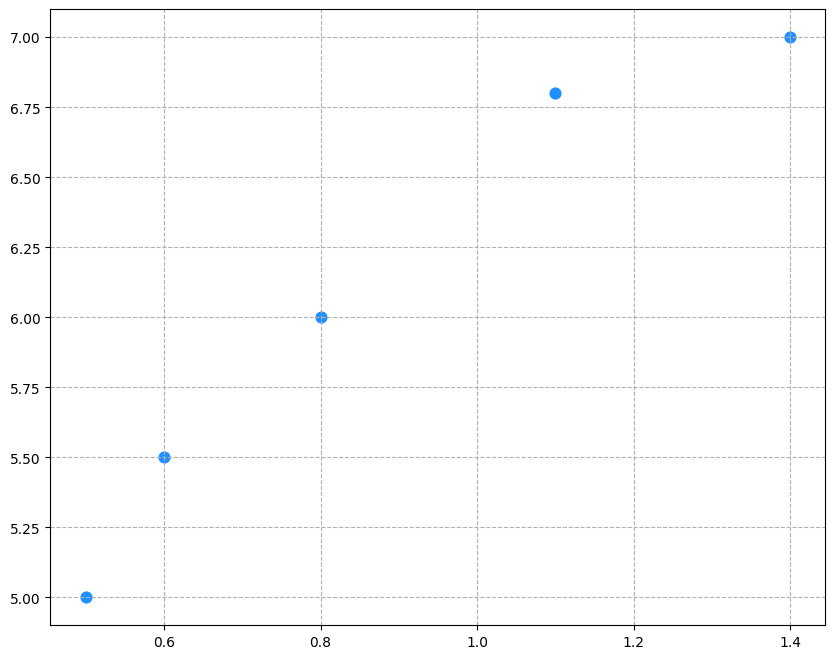

In [50]:
x = np.array([0.5,0.6,0.8,1.1,1.4])
y = np.array([5.0,5.5,6.0,6.8,7.0])

plt.figure(figsize=(10,8),dpi=100)
plt.grid(linestyle='--')
plt.scatter(x=x,y=y,s=60,color='dodgerblue',label='Sample')
plt.show()

参数更新公式：--> w0为截距，w1为系数
+ w0偏导数：(w0 + w1*x - y).sum()
+ w1偏导数：(x(w1*x + w0 - y)).sum()
+ loss = ((w0 + w1*x - y)**2).sum() / 2

   1,w0:1.00000000,w1:1.00000000,loss:44.17500000
   2,w0:1.20900000,w1:1.19060000,loss:36.53882794
   3,w0:1.39916360,w1:1.36357948,loss:30.23168666
   4,w0:1.57220792,w1:1.52054607,loss:25.02222743
   5,w0:1.72969350,w1:1.66296078,loss:20.71937337
   6,w0:1.87303855,w1:1.79215140,loss:17.16530917
   7,w0:2.00353196,w1:1.90932461,loss:14.22969110
   8,w0:2.12234508,w1:2.01557706,loss:11.80486494
   9,w0:2.23054244,w1:2.11190537,loss:9.80191627
  10,w0:2.32909148,w1:2.19921529,loss:8.14740839
  11,w0:2.41887143,w1:2.27832995,loss:6.78068803
  12,w0:2.50068134,w1:2.34999742,loss:5.65166010
  13,w0:2.57524739,w1:2.41489755,loss:4.71894976
  14,w0:2.64322953,w1:2.47364820,loss:3.94838447
  15,w0:2.70522753,w1:2.52681085,loss:3.31174023
  16,w0:2.76178648,w1:2.57489580,loss:2.78570611
  17,w0:2.81340174,w1:2.61836680,loss:2.35102901
  18,w0:2.86052351,w1:2.65764531,loss:1.99180729
  19,w0:2.90356094,w1:2.69311435,loss:1.69490738
  20,w0:2.94288586,w1:2.72512202,loss:1.44948190
  21,w0:2.97

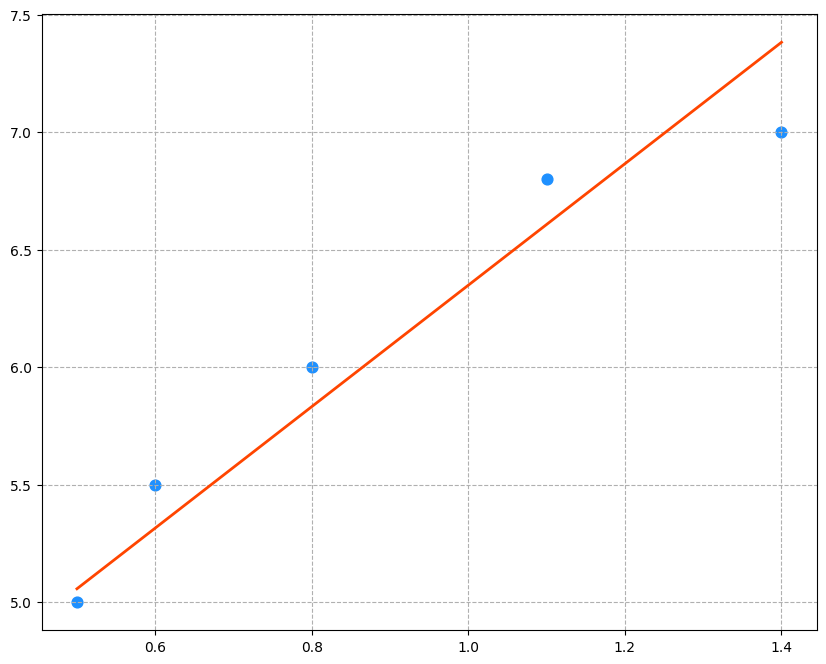

In [51]:
# 基于梯度下降算法，迭代w0与w1，从而找到最佳的模型参数
w0, w1, lrate = 1, 1, 0.01  # 初始化w0,w1为1；超参数：学习率
times = 300  # 与迭代次数

w0s, w1s, losses, epoches = [], [], [], []  # 绘图数据准备，epcoches为x轴
for i in range(times):
    # 输出每一轮运算中，w0, w1, loss的变化过程
    loss = ((w0 + w1*x - y)**2).sum() / 2
    print('{:4},w0:{:.8f},w1:{:.8f},loss:{:.8f}'.format(i+1,w0,w1,loss))
    
    # 绘图数据准备
    epoches.append(i+1)
    w0s.append(w0)
    w1s.append(w1)
    losses.append(loss)
            
    # 计算w0与w1方向上的偏导数，带入模型参数的更新公式
    d0 = (w0 + w1*x - y).sum()
    d1 = (x * (w1*x + w0 - y)).sum()
    # 更新w0与w1
    w0 = w0 - lrate * d0
    w1 = w1 - lrate * d1

w0,w1  # -->截距与系数(4.030262453183928, 2.3024428289876377)

# 绘制样本点
plt.figure(figsize=(10,8),dpi=100)
plt.grid(linestyle='--')
plt.scatter(x=x,y=y,s=60,color='dodgerblue',label='Sample')
# 绘制回归线
pred_y = w0 + w1*x
plt.plot(x,pred_y,color='orangered',linewidth=2,label='Regression Line')

plt.show()

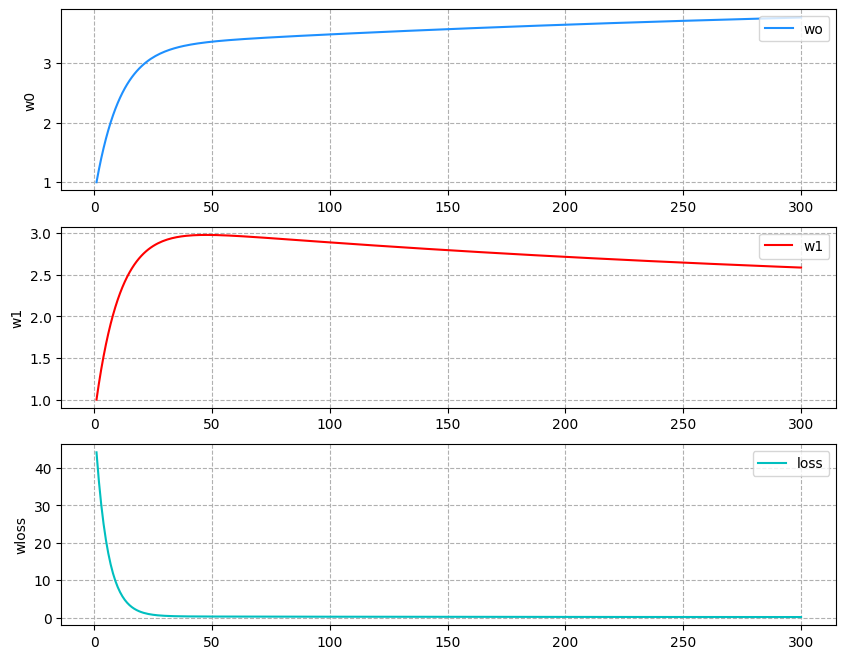

In [52]:
# 超参数可视化
# 绘制子图
plt.figure(figsize=(10,8),dpi=100)
plt.subplot(311)
plt.grid(linestyle='--')
plt.ylabel('w0')
plt.plot(epoches,w0s,color='dodgerblue',label='wo')
plt.legend(loc='upper right')

plt.subplot(312)
plt.grid(linestyle='--')
plt.ylabel('w1')
plt.plot(epoches,w1s,color='r',label='w1')
plt.legend(loc='best')

plt.subplot(313)
plt.grid(linestyle='--')
plt.ylabel('wloss')
plt.plot(epoches,losses,color='c',label='loss')
plt.legend(loc='best')

plt.show()

**岭回归**
+ 在模型迭代过程所依据的损失函数中增加了 正则项 ，限制模型参数对异常样本的匹配程度，进而提高模型面对多数正常样本的拟合精度

In [ ]:
"""
import sklearn.linear_model as lm
# 创建模型
model = lm.Ridge(正则强度, 
                fit_intercept=是否训练截距,   # 默认True
                max_iter=最大迭代次数)  # 默认-1    
# 训练模型
# 输入为一个二维数组表示的样本矩阵
# 输出为每个样本最终的结果
model.fit(输入, 输出)

# 预测输出
# 输入array是一个二维数组
result = model.predict(array)

"""

**多项式回归**
1. 针对一元多项式回归问题中自变量做特征扩展，转换为多元线性回归问题(只需给出多项式最高次数即可)
2. 将得到的特征扩展后的结果作为训练样本，交给线性回归器训练多元线性模型

In [ ]:
"""
# 使用sklearn提供的 数据管线 实现多项式回归

import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm

model = pl.make_pipeline(
    sp.PolynomialFeatures(10),  # 多项式特征扩展器
    lm.LinearRegression()  # 线性回归器
)
"""